# Problem 1 (R)

---

### Questions

1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv
2. Create a contingency table of workclass and sex, and plot it.
3. Create a contingency table of sex and marital status, and plot it.
4. Create a new data frame, adultOver40, for those whose age > 40.
5. Recreate the contingency table of sex and marital status for adultOver40.
6. Determine whether any outliers exist for the education field.
7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?
8. Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.
9. Summarize your findings.

Summarization and overall explanation located at the end of the notebook.

---

In [82]:
# 1. Reading the data file

library(readr)
adult_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

In [83]:
# 1. Convert to data frame and summarize

summary(adult_training)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

In [86]:
# 2. Creating the contingency table using the CrossTable() function in the gmodels package.

# 2-Way Cross Tabulation
install.packages("gmodels")
library(gmodels)

# Contingency table between workclass and sex
# sex will be columns
CrossTable(adult_training$workclass, adult_training$sex)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14797 

 
                         | adult_training$sex 
adult_training$workclass |    Female |      Male | Row Total | 
-------------------------|-----------|-----------|-----------|
                       ? |       377 |       452 |       829 | 
                         |    37.662 |    18.715 |           | 
                         |     0.455 |     0.545 |     0.056 | 
                         |     0.077 |     0.046 |           | 
                         |     0.025 |     0.031 |           | 
-------------------------|-----------|-----------|-----------|
             Federal-gov |       149 |       305 |       454 | 
                         |     0.019 |     0.010 |           | 
                         |     0.328 |     0.672 |     0

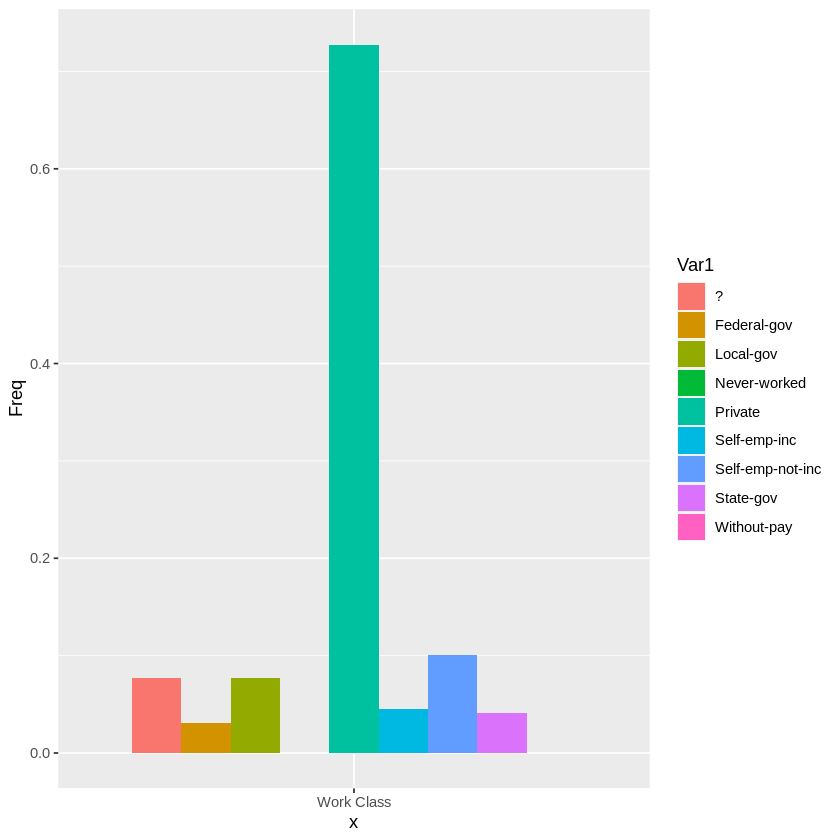

In [87]:
# 2. Plotting the cross table of workclass and sex using ggplot2

library("ggplot2")

# the contingency table for $workclass vs. $sex variables
P <- prop.table(table(adult_training$workclass, adult_training$sex), margin=2)

ggplot(as.data.frame(P), aes(x = 'Work Class', y = Freq, fill = Var1)) +

# dodge: display the bars next to each other, try 'fill' as well for proportions
# count the rows for each x value
# identity: skip aggregation
geom_bar(stat="identity", position = "dodge")

In [89]:
# 3. Creating the contingency table using the CrossTable() function in the gmodels package.

# 2-Way Cross Tabulation
install.packages("gmodels")
library(gmodels)

# Contingency table between marital-status and sex
# sex will be columns
CrossTable(adult_training$'marital-status', adult_training$sex)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14797 

 
                                | adult_training$sex 
adult_training$"marital-status" |    Female |      Male | Row Total | 
--------------------------------|-----------|-----------|-----------|
                       Divorced |      1219 |       795 |      2014 | 
                                |   453.176 |   225.190 |           | 
                                |     0.605 |     0.395 |     0.136 | 
                                |     0.248 |     0.080 |           | 
                                |     0.082 |     0.054 |           | 
--------------------------------|-----------|-----------|-----------|
              Married-AF-spouse |         7 |         4 |        11 | 
                                |     3.071 |     

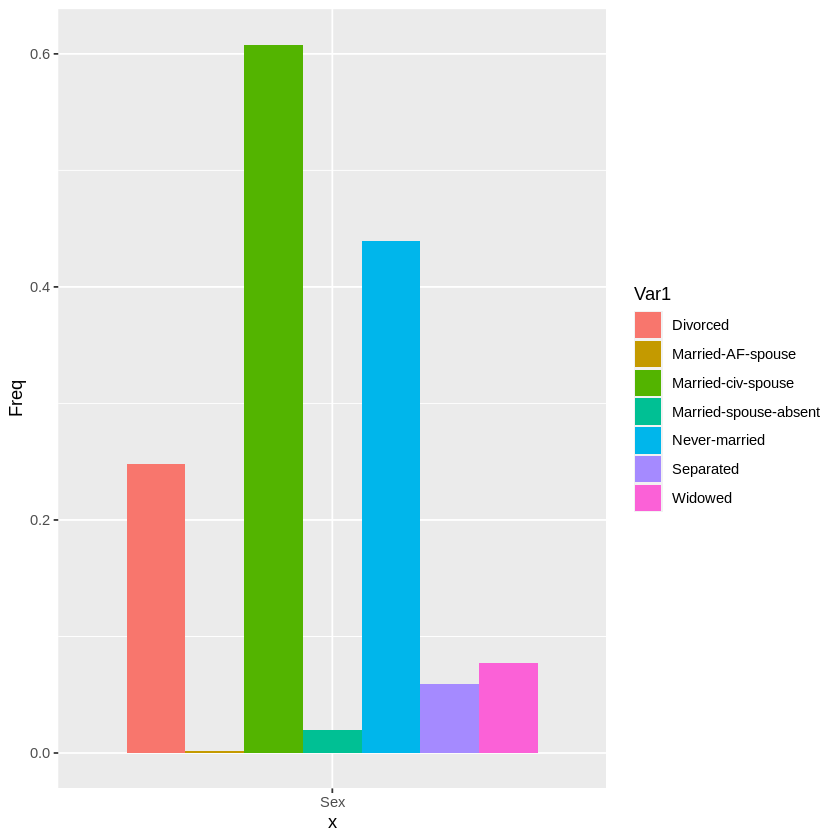

In [91]:
# 3. Plotting the cross table of sex and marital-status using ggplot2

library("ggplot2")

# the contingency table for $'marital-status' vs. $sex variables
P <- prop.table(table(adult_training$'marital-status', adult_training$sex), margin=2)

ggplot(as.data.frame(P), aes(x = 'Sex', y = Freq, fill = Var1)) +

# dodge: display the bars next to each other, try 'fill' as well for proportions
# count the rows for each x value
# identity: skip aggregation
geom_bar(stat="identity", position = "dodge")

In [93]:
# 4. Create a new data frame, adultOver40, for those whose age > 40.

adultOver40 <- subset(adult_training, adult_training$age > 40)

summary(adultOver40)

      age         workclass           education     marital-status    
 Min.   :41.00   Length:6144        Min.   : 1.00   Length:6144       
 1st Qu.:45.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :50.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :52.08                      Mean   :10.15                     
 3rd Qu.:57.00                      3rd Qu.:13.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss   
 Length:6144        Length:6144        Min.   :    0   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.0  
 Mode  :character   Mode  :character   Median :    0   Median :   0.0  
                                       Mean   : 1598   Mean   : 115.3  
                                       3rd Qu.:    0   3rd Qu.:   0.0  
                                       Max.   :99999   Max.   :4356.0  

In [95]:
# 5. Creating the contingency table using the CrossTable() function in the gmodels package.

# 2-Way Cross Tabulation
install.packages("gmodels")
library(gmodels)

# Contingency table between marital-status and sex for people 40 or above
# sex will be columns
CrossTable(adultOver40$'marital-status', adultOver40$sex)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  6144 

 
                             | adultOver40$sex 
adultOver40$"marital-status" |    Female |      Male | Row Total | 
-----------------------------|-----------|-----------|-----------|
                    Divorced |       720 |       448 |      1168 | 
                             |   413.254 |   172.046 |           | 
                             |     0.616 |     0.384 |     0.190 | 
                             |     0.399 |     0.103 |           | 
                             |     0.117 |     0.073 |           | 
-----------------------------|-----------|-----------|-----------|
          Married-civ-spouse |       305 |      3383 |      3688 | 
                             |   559.881 |   233.090 |           | 
                

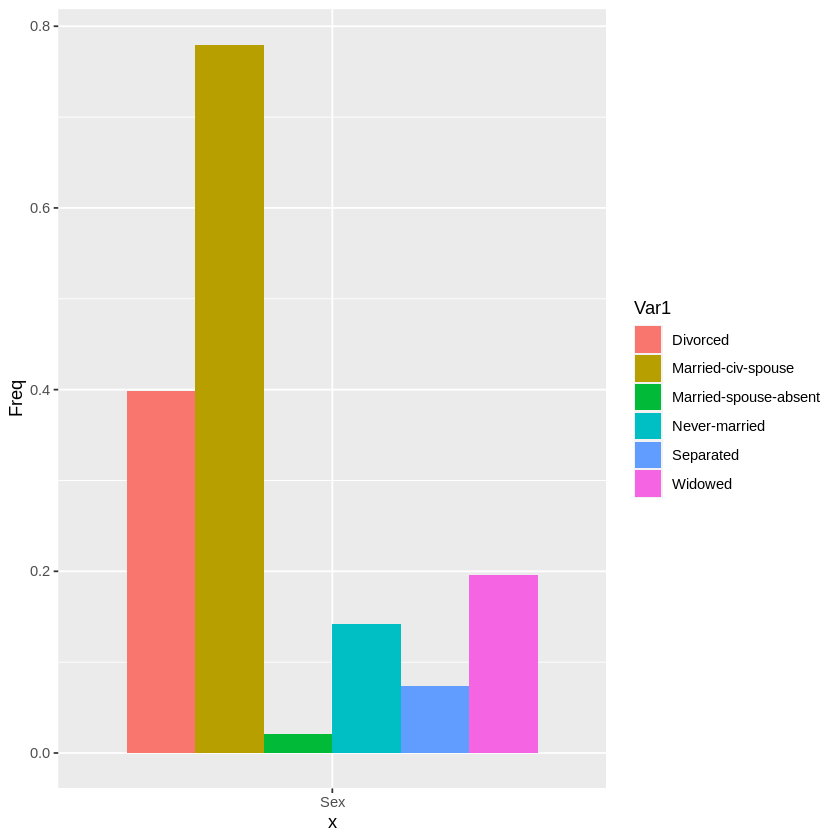

In [96]:
# 5. Plotting the cross table of sex and marital-status for adultOver40 using ggplot2

library("ggplot2")

# the contingency table for $'marital-status' vs. $sex variables for adultOver40
P <- prop.table(table(adultOver40$'marital-status', adultOver40$sex), margin=2)

ggplot(as.data.frame(P), aes(x = 'Sex', y = Freq, fill = Var1)) +

# dodge: display the bars next to each other, try 'fill' as well for proportions
# count the rows for each x value
# identity: skip aggregation
geom_bar(stat="identity", position = "dodge")

In [97]:
# 6. Determine whether any outliers exist for the education field.

# Standardize the education field using the scale() function
adult_training$scaled_education <- scale(x = adult_training$education)

# Summarize the new data
summary(adult_training$scaled_education)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  

In [98]:
# 6. Find the number of outliers in scaled education.
# If no outliers exist, there are no outliers.
# If the result is greater than 0, then outliers do exist.

# Determine the three sigma rule first for the scaled_age attribute
three_sigma_rule <- (adult_training$scaled_education < -3 |
                     adult_training$scaled_education > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers.")

There are 113 outliers.

In [99]:
# 7. Standardize (zero mean) the age variable and summarize

# Standardize using the scale() function
adult_training$scaled_age <- scale(x = adult_training$age)

# Summarize the new data
summary(adult_training$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.69   48.00   90.00 

In [100]:
# 7. Identify how many outliers there are.

# Determine the three sigma rule first for the scaled_age attribute
three_sigma_rule <- (adult_training$scaled_age < -3 |
                     adult_training$scaled_age > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers.")

There are 60 outliers.

In [101]:
# 7. What is the most extreme outlier?
# The max value for the scaled variable is greater than 3.
# The min value for the scaled variable is less than -3.
# Therefore, the most extreme outlier is the max value for age.

cat ("The most extreme outlier for scaled_age is" , max(adult_training$scaled_age), "\n")
cat ("The most extreme outlier for age is" , max(adult_training$age))

The most extreme outlier for scaled_age is 3.751227 
The most extreme outlier for age is 90

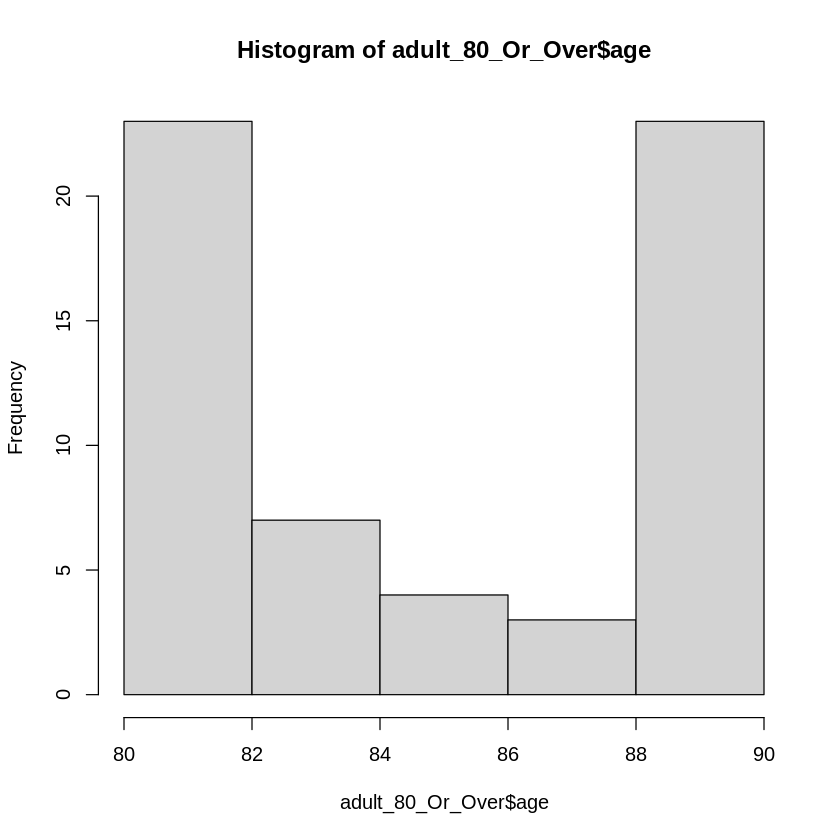

In [103]:
# 8. Selecting only records with age at least 80

adult_80_Or_Over <- subset(adult_training, age >= 80)

# Constructing a histogram of the data
hist(adult_80_Or_Over$age)

# It seems that there is an anomoly since the data stops at the age of 90.

---
## 9. Summarize your findings.
---
1. I read the provided data file, converted it to a data frame and summarized it.
2. I created the crosstab of the workclass and sex variables. I used workclass for the rows and sex for the columns. I plotted the data with ggplot2. Private was the highest workclass for both males and females.
3. I created the crosstab of the sex and marital-status variables. I used marital-status for the rows and sex for the columns. I plotted the data with ggplot2. Married-civ-spouse, never-married, and divorced were the 3 highest marital-status for males and females.
4. I created a new data frame for adults over 40 and summarized it.
5. I created the crosstab for sex and marital-status variables for adults with an age of 40 or over. I used marital-status for the rows and sex for the columns. I plotted the data with ggplot2. This time, married-civ-spouse was still the highest marital-status for males and females 40 or above. The divorced marital-status increased in frequency and the never-married martial-status decreased in frequency for adults 40 or above.
6. I first standardized the education field using the scale() function and summarized the new scaled_education variable. To determine if there were any outliers, I summed up the number of outliers in the scaled_education field using the three-sigma-rule. I found that there were 113 outliers counted within the field. Therefore, outliers did exist within the education field.
7. I first standardized the age variable using the scale() function and summarized the new scaled_age variable. I counted the number of outliers using the three-sigma-rule. I found that 60 values lied outside 3 standard deviations of the mean. Looking at the basic stats for the scaled_age variable, I noticed that the min value (-1.59) was greater than -3, and the max value (3.75) was greater than 3. I used this information to confirm that the max value was the most extreme outlier within the field since it was 3 standard deviations above the mean and the min value also did not exceed 3 standard deviations below the mean. Therefore, the most extreme outlier in the scaled_age field was 3.75, and the most extreme outlier in the age field was 90.
8. I made a new data frame for adults greater than or equal to the age of 80 using the subset() function. I then selected the age column and made a histogram out of it using the hist() function. It appears that there is a large number of people at the age of 90 and there is no one older than that. This could be an anomoly in the data since people can go above the age of 90. This shows that the age was perhaps capped at 90 when collecting the data, or there may have been an error that did not include data from people older than 90.
---